# Graded Project
Machine Learning - Unsupervised Learning
Domain:
○ E-commerce
Business Context:
● Customer segmentation is one of the most important marketing tools at your
disposal, because it can help a business to better understand its target audience.
This is because it groups customers based on common characteristics.
● Segmentation can be based on the customer’s habits and lifestyle, in
particular, their buying habits. Different age groups, for example, tend to
spend their money in different ways, so brands need to be aware of who
exactly is buying their product.
● Segmentation also focuses more on the personality of the consumer,
including their opinions, interests, reviews, and rating. Breaking down a
large customer base into more manageable clusters, making it easier to
identify your target audience and launch campaigns and promote the
business to the most relevant people
Dataset Description:
The dataset contains measurements of clothing fit from RentTheRunway.
RentTheRunWay is a unique platform that allows women to rent clothes for
various occasions. The collected data is of several categories. This dataset
contains self-reported fit feedback from customers as well as other side
information like reviews, ratings, product categories, catalog sizes, customers’
measurements (etc.)
Attribute Information:
SL.No Attribute Description
1. user_id a unique id for the customer
2. item_id unique product id
3. weight weight measurement of customer
4. rented for purpose clothing was rented for
5. body type body type of customer
6. review_text review given by the customer
7. size the standardized size of the product
8. rating rating for the product
9. age age of the customer
10. category the category of the product
11. bust size bust measurement of customer
12. height height of the customer
13. review_date date when the review was written
14. fit fit feedback
Data Citation:
● Rishabh Misra, Mengting Wan, Julian McAuley "Decomposing Fit Semantics
for Product Size Recommendation in Metric Spaces". RecSys, 2018.
● Rishabh Misra, Jigyasa Grover "Sculpting Data for ML: The first act of
Machine Learning". 2021.
Project Objective:
Based on the given users and items data of an e-commerce company, segment
the similar user and items into suitable clusters. Analyze the clusters and provide
your insights to help the organization promote their business.
Steps to the project: [Total score: 50 points]

● Import the required libraries and load the data: [ Score: 3 point ]
1. Load the required libraries and read the dataset. (1)
2. Check the first few samples, shape, info of the data and try to familiarize
yourself with different features (2)

In [1]:
## 1.import the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder


import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
import csv
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
## load the dataset and read them
df = pd.read_csv('renttherunway.csv')
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [3]:
## 2. check few samples
df.sample(8)

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
98853,98853,fit,971615,32d,159395,118lbs,6.0,formal affair,"I got this as a back up, and didn't wear it. I...",straight & narrow,"Interesting Dress, not my favorite",gown,"5' 5""",8,28.0,"June 2, 2014"
53673,53673,fit,710261,34c,763288,118lbs,10.0,wedding,"Beautiful pattern, great color and material. I...",full bust,...,dress,"5' 5""",1,34.0,"August 3, 2014"
74980,74980,small,131088,32a,236205,123lbs,10.0,formal affair,I loved this dress. Only thing you need to kno...,athletic,Tight at the top,dress,"5' 7""",12,27.0,"October 5, 2017"
186979,186979,fit,287948,38d,144727,NaN,10.0,party,Received so many compliments that it was diffi...,hourglass,"Beautiful dress, received many compliments on ...",sheath,"5' 1""",32,40.0,"March 20, 2014"
159200,159200,fit,458740,34b,940419,135lbs,10.0,everyday,"The fit, length, and style of this dress are a...",pear,Obsessed with this dress!,dress,"5' 4""",12,28.0,"June 25, 2017"
152912,152912,small,205281,30a,1400094,100lbs,10.0,formal affair,It is super tight and people should know that ...,petite,I felt so sexy in this dress!,dress,"5' 5""",4,29.0,"June 27, 2017"
61312,61312,fit,124703,34b,124204,137lbs,10.0,party,"The fit was good. A little short, but I wore w...",athletic,Loved it. Sparkles showed up in every photo.,dress,"5' 5""",8,42.0,"December 21, 2015"
83825,83825,fit,528379,32b,1676837,120lbs,10.0,party,I received so many compliments. This dress is ...,athletic,We attended an event in a garden this summer a...,dress,"5' 4""",4,32.0,"July 3, 2015"


In [4]:
## check the shape
df.shape

(192544, 16)

In [5]:
## checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

● Data cleansing and Exploratory data analysis: [ Score: 20 point ]

3. Check if there are any duplicate records in the dataset? If any, drop them.(1)
4. Drop the columns which you think redundant for the analysis.(Hint: drop
columns like ‘id’, ‘review’) (1)
5. Check the column 'weight', Is there any presence of string data? If yes, remove
the string data and convert to float. (Hint: 'weight' has the suffix as lbs) (2)
6. Check the unique categories for the column 'rented for' and group 'party:
cocktail' category with 'party'. (2)
7. The column 'height' is in feet with a quotation mark, Convert to inches with
float datatype. (3)
8. Check for missing values in each column of the dataset? If it exists, impute
them with appropriate methods. (3)
9. Check the statistical summary for the numerical and categorical columns and
write your findings. (3)
10. Are there outliers present in the column age? If yes, treat them with the
appropriate method. (3)
11. Check the distribution of the different categories in the column 'rented for'
using appropriate plot. (2)


In [6]:
##check for null
df.isnull().sum()/len(df)*100

Unnamed: 0         0.000000
fit                0.000000
user_id            0.000000
bust size          9.561970
item_id            0.000000
weight            15.571506
rating             0.042588
rented for         0.005194
review_text        0.032200
body type          7.601899
review_summary     0.179180
category           0.000000
height             0.351608
size               0.000000
age                0.498587
review_date        0.000000
dtype: float64

In [7]:
## 3.check duplicates
len(df[df.duplicated()])

0

* no duplicate records found

In [8]:
## 4.drop the columns
df = df.drop(columns=['user_id','item_id','review_date'],axis=1)
df.head()

,Unnamed: 0,fit,bust size,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age
0,0,fit,34d,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0
1,1,fit,34b,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0
2,2,fit,NaN,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0
3,3,fit,34c,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0
4,4,fit,34b,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0


In [9]:
## 5.check for presene of string data
df.weight.dtypes

dtype('O')

data type is object.

In [10]:
## convert to float
df['weight']=df['weight'].str.replace('lbs','').astype(float)

In [11]:
df['weight']

0         137.0
1         132.0
2           NaN
3         135.0
4         145.0
          ...  
192539    140.0
192540    100.0
192541    135.0
192542    165.0
192543    155.0
Name: weight, Length: 192544, dtype: float64

In [12]:
## 6. check for unique in rented for
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [13]:
df['rented for']=df['rented for'].str.replace('party: cocktail','party')

In [14]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

In [15]:
## 7. convert height to inches, float data type
df['height']=(df['height'].str.split("'",expand=True)[0].astype(float))*12+df['height'].str.split("'",expand=True)[1].str.split('"',expand=True)[0].astype(float)
#def parse_ht(height):
    # format: 7' 0.0"
#    ht_ = ht.split("' ")
#    ft_ = float(ht_[0])
#    in_ = float(ht_[1].replace("\"",""))
#    return (12*ft_) + in_

#print df["height"].apply(lambda x:parse_ht(x))

In [16]:
df['height']

0         68.0
1         66.0
2         64.0
3         65.0
4         69.0
          ... 
192539    69.0
192540    61.0
192541    68.0
192542    66.0
192543    66.0
Name: height, Length: 192544, dtype: float64

In [17]:
## 8. check for missing values, replace with appropriate value
df.isna().sum()/len(df)*100

Unnamed: 0         0.000000
fit                0.000000
bust size          9.561970
weight            15.571506
rating             0.042588
rented for         0.005194
review_text        0.032200
body type          7.601899
review_summary     0.179180
category           0.000000
height             0.351608
size               0.000000
age                0.498587
dtype: float64

In [18]:
for col in ['bust size','weight','rating','rented for','body type','height','age']:
    df[col].fillna(df[col].mode()[0],inplace=True)
df

,Unnamed: 0,fit,bust size,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age
0,0,fit,34d,137.0,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,68.0,14,28.0
1,1,fit,34b,132.0,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,66.0,12,36.0
2,2,fit,34b,130.0,10.0,party,This hugged in all the right places! It was a ...,hourglass,It was a great time to celebrate the (almost) ...,sheath,64.0,4,116.0
3,3,fit,34c,135.0,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,65.0,8,34.0
4,4,fit,34b,145.0,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,69.0,12,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,192539,fit,34dd,140.0,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,69.0,8,42.0
192540,192540,fit,32c,100.0,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,61.0,4,29.0
192541,192541,fit,36a,135.0,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,68.0,8,31.0
192542,192542,fit,36c,165.0,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,66.0,16,31.0


In [19]:
df.isna().sum()/len(df)*100

Unnamed: 0        0.00000
fit               0.00000
bust size         0.00000
weight            0.00000
rating            0.00000
rented for        0.00000
review_text       0.03220
body type         0.00000
review_summary    0.17918
category          0.00000
height            0.00000
size              0.00000
age               0.00000
dtype: float64

In [20]:
## 9. Check stastical summary
df.describe()

,Unnamed: 0,weight,rating,height,size,age
count,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,96271.500000,136.240709,9.092758,65.306013,12.245175,33.856703
std,55582.809453,20.300468,1.429862,2.659925,8.494877,8.040513
min,0.000000,50.000000,2.000000,54.000000,0.000000,0.000000
25%,48135.750000,125.000000,8.000000,63.000000,8.000000,29.000000
50%,96271.500000,130.000000,10.000000,65.000000,12.000000,32.000000
75%,144407.250000,145.000000,10.000000,67.000000,16.000000,37.000000
max,192543.000000,300.000000,10.000000,78.000000,58.000000,117.000000


In the summary we can find:
There are total 192544 entries
Min weight is 50 lbs,max weight is 300 lbs,average weight is 136.24 lbs.
Min rating is 2 while max is 10,more than 50% entries contain 10 rating
Min height is 54 inch while max is 78 inch,maximum entries have height more than mean height of 65.30
Min age is 0 while max age is 117 ,maximum entries are above age of 30

In [21]:
df[['fit','bust size','rented for','body type','category']].value_counts(normalize=True)

fit    bust size  rented for     body type  category
fit    34b        wedding        hourglass  dress       0.009785
                  formal affair  hourglass  gown        0.008627
                  wedding        athletic   dress       0.007557
                  formal affair  athletic   gown        0.006388
                  party          hourglass  dress       0.006238
                                                          ...   
       38d        formal affair  apple      shift       0.000005
                                 athletic   maxi        0.000005
                                 full bust  jumpsuit    0.000005
                                            maxi        0.000005
small  46ddd/e    formal affair  apple      dress       0.000005
Length: 20655, dtype: float64

In [22]:
df['fit'].unique()

array(['fit', 'small', 'large'], dtype=object)

In [23]:
df['bust size'].unique()

array(['34d', '34b', '34c', '32b', '34d+', '36d', '36a', '32d+', '36c',
       '32c', '32dd', '30dd', '32d', '36b', '34a', '34dd', '40ddd/e',
       '32a', '38d+', '38c', '34ddd/e', '38a', '38b', '38d', '36ddd/e',
       '38dd', '38f', '42dd', '36dd', '40g', '40dd', '28f', '30ddd/e',
       '32ddd/e', '28b', '36d+', '40d', '28dd', '34f', '42c', '30d',
       '30b', '42d', '34aa', '32aa', '36f', '28c', '40b', '36aa', '34g',
       '32f', '42ddd/e', '40c', '28g', '28aa', '36g', '30a', '44ddd/e',
       '30c', '30aa', '44dd', '32i', '32g', '30g', '38h', '30h', '34j',
       '38ddd/e', '32h', '28a', '44d', '40h', '38g', '34h', '36j', '40f',
       '36h', '28ddd/e', '44f', '34i', '30f', '36i', '30i', '28h', '42b',
       '42j', '32j', '46c', '48d', '38aa', '38i', '48dd', '28d', '28i',
       '46ddd/e', '42g', '44c', '42f', '40j', '38j', '46f', '44b', '44g',
       '42h', '40i', '44h'], dtype=object)

In [24]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work'], dtype=object)

In [25]:
df['body type'].unique()

array(['hourglass', 'straight & narrow', 'pear', 'athletic', 'full bust',
       'petite', 'apple'], dtype=object)

In [26]:
df['category'].unique()

array(['romper', 'gown', 'sheath', 'dress', 'leggings', 'top', 'jumpsuit',
       'sweater', 'jacket', 'shirtdress', 'maxi', 'shift', 'pants',
       'shirt', 'mini', 'skirt', 'pullover', 'blouse', 'suit', 'coat',
       'trench', 'bomber', 'cape', 'blazer', 'vest', 'duster', 'ballgown',
       'tank', 'poncho', 'frock', 'tunic', 'cardigan', 'culottes', 'down',
       'trouser', 'midi', 'pant', 'legging', 'print', 'knit', 'culotte',
       'sweatshirt', 'peacoat', 'kaftan', 'overalls', 'jogger', 'tee',
       'combo', 'henley', 'cami', 'blouson', 'turtleneck', 'trousers',
       'overcoat', 'hoodie', 't-shirt', 'caftan', 'tight', 'kimono',
       'for', 'crewneck', 'skirts', 'parka', 'buttondown', 'skort',
       'sweatershirt', 'sweatpants', 'jeans'], dtype=object)

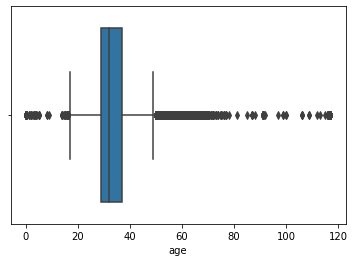

In [27]:
## 10. Check for outliers in age, replace them appropriately
sns.boxplot(df['age'])
plt.show()

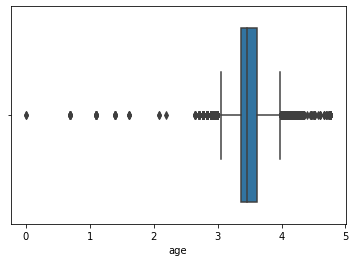

In [28]:
## let use log transformation and transform the column age and visualize the distribution
age_log = np.log(df['age'])
sns.boxplot(age_log)
plt.show()

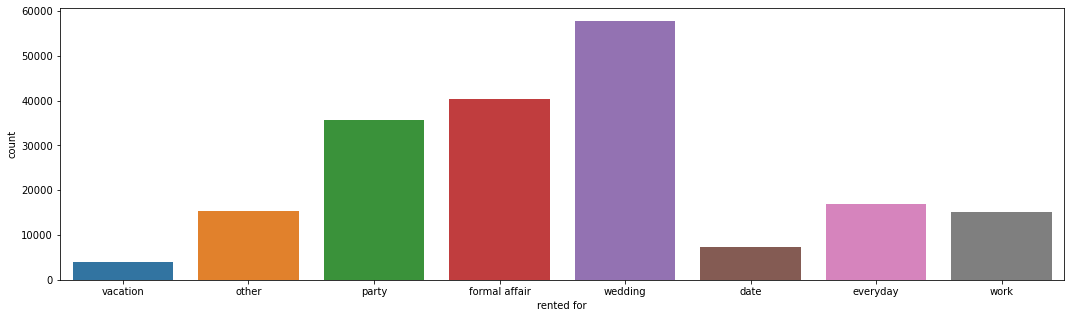

In [29]:
## 11.Check the distribution of the different categories in the column 'rented for'
plt.figure(figsize=(18,5))
sns.countplot(df['rented for'])
plt.show()

● Data Preparation for model building: [ Score: 2 point ]
12. Encode the categorical variables in the dataset. (1)
13. Standardize the data, so that the values are within a particular range. (1)

In [36]:
## 12. Encode the data
le=LabelEncoder()

In [37]:
df.iloc[:,[0,1,5,6,7]]=df.iloc[:,[0,1,5,6,7]].apply(le.fit_transform)

In [38]:
df.iloc[:,[0,1,5,6,7]].head()

,Unnamed: 0,fit,rented for,review_text,body type
0,0,0,5,4364,3
1,1,0,3,61040,6
2,2,0,4,162991,3
3,3,0,2,63856,4
4,4,0,6,42647,1


In [42]:
## 13. Standardize the data, put them in a particular range
df1=df.copy()
scaled_feature=StandardScaler().fit_transform(df1.values)
scaled_feature_df=pd.DataFrame(scaled_feature,index=df1.index,columns=df1.columns)

ValueError: could not convert string to float: '34d'

In [ ]:
scaled_feature_df

● Principal Component Analysis and Clustering: [ Score: 23 point ]

14. Apply PCA on the above dataset and determine the number of PCA
components to be used so that 90-95% of the variance in data is explained by
the same. (7)
15. Apply K-means clustering and segment the data. (You may use original
data or PCA transformed data) (8)
a. Find the optimal K Value using elbow plot for K Means clustering.
b. Build a Kmeans clustering model using the obtained optimal K value
from the elbow plot.
c. Compute silhouette score for evaluating the quality of the K Means
clustering technique.
16. Apply Agglomerative clustering and segment the data. (You may use
original data or PCA transformed data) (8)
a. Find the optimal K Value using dendrogram for Agglomerative clustering.
b. Build a Agglomerative clustering model using the obtained optimal K
value observed from dendrogram.
c. Compute silhouette score for evaluating the quality of the Agglomerative
clustering technique. (Hint: Take a sample of the dataset for agglomerative
clustering to reduce the computational time)


In [34]:
## 14. Appply PCA on dataset, determine components to be used so that 90-95% variance is explained
## step1: calculate the covariance matrix
cov_matrix=np.cov(scaled_feature.T)
cov_matrix

NameError: name 'scaled_feature' is not defined

● Conclusion : [ Score: 2 point ]

17. Perform cluster analysis by doing bivariate analysis between cluster labels
and different features and write your conclusion on the results. (2)